In [4]:
%load_ext autoreload

%autoreload 2
import pandas as pd
import numpy as np
%aimport Variant_analysis_helper_functions

import seaborn as sns
import matplotlib.pyplot as plt
import protfasta
import os
import glob

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Comparing the frequency of gnomAD variants in AD vs DBD

Using this helper function to get the length of each domain

In [2]:
d_domains = "../outputs/mutations/domains_expanded_iWES_v2_variants_snv_classified/"
files = os.listdir(d_domains)
ENST_codes = [f.replace(".bed", "") for f in files if f !='.ipynb_checkpoints']

uniprotID_ENST_mapping = pd.read_csv("../../data/SFARI_TFs_with_ENST_corrected.csv")
uniprotID_ENST_mapping = uniprotID_ENST_mapping[["uniprotID", "ENST"]]
uniprotID_ENST_mapping["ENST"] = uniprotID_ENST_mapping["ENST"].str.split(".").str[0]
uniprotID_ENST_mapping_dict= dict(zip(uniprotID_ENST_mapping["ENST"], uniprotID_ENST_mapping["uniprotID"]))
uniprotID_ENST_mapping_dict['ENST00000434704'] = 'O60479'

# ENSTs to keep, SK 11/18/24
ENST_codes = set(ENST_codes) & set(uniprotID_ENST_mapping_dict.keys())

SFARI_TFs = pd.read_csv("../../data/SFARI_TFs_with_ENST.csv")

output = Variant_analysis_helper_functions.generate_df(ENST_codes, uniprotID_ENST_mapping_dict, 0, 1, domain_types = ["AD", "DBD", "RD"], print_output = False)
output

,uniprotID,TF_cds_length,TF_missense,TF_missense_prop,AD_cds_length,AD_missense,AD_missense_prop,DBD_cds_length,DBD_missense,DBD_missense_prop,RD_cds_length,RD_missense,RD_missense_prop
0,P32242,1065,108,0.101408,549,67,0.122040,171,9,0.052632,0,0,NaN
1,P43354,1797,159,0.088481,318,16,0.050314,210,9,0.042857,1080,116,0.107407
2,P78337,945,126,0.133333,150,23,0.153333,171,9,0.052632,255,43,0.168627
3,Q9NQB0,1860,204,0.109677,300,19,0.063333,207,6,0.028986,0,0,NaN
4,Q9UGL1,4635,542,0.116936,270,38,0.140741,255,20,0.078431,351,36,0.102564
5,P19532,1728,128,0.074074,1059,90,0.084986,162,3,0.018519,0,0,NaN
6,Q02548,1176,93,0.079082,165,15,0.090909,375,10,0.026667,99,11,0.111111
7,P10827,1473,125,0.084861,156,13,0.083333,216,19,0.087963,0,0,NaN
8,Q14938,1509,86,0.056991,267,16,0.059925,315,15,0.047619,0,0,NaN
9,Q5T1R4,7221,985,0.136408,2592,336,0.129630,282,17,0.060284,270,21,0.077778


Now, reading in the gnomad variants in each domain

In [7]:
all_domains = []
for filepath in glob.glob("../outputs/mutations/domains_gnomad_snv_classified/*"):
    all_domains.append(pd.read_csv(filepath, sep = "\t", header = None))
all_domains = pd.concat(all_domains)
all_domains

,0,1,2,3,4,5,6,7,8,9,...,13,14,15,16,17,18,19,20,21,22
0,18,55461022,55461023,AD,ENSG00000196628,.,-,ENST00000356073,18,55461022,...,-,18,55461022,55461023,T,C,1.593062e-06,I,M,No-Syn
1,18,55461032,55461033,AD,ENSG00000196628,.,-,ENST00000356073,18,55461032,...,-,18,55461032,55461033,T,C,1.200362e-06,N,S,No-Syn
2,18,55461034,55461035,AD,ENSG00000196628,.,-,ENST00000356073,18,55461034,...,-,18,55461034,55461035,G,C,1.592788e-06,V,V,Syn
3,18,55461035,55461036,AD,ENSG00000196628,.,-,ENST00000356073,18,55461035,...,-,18,55461035,55461036,A,C,6.844852e-06,V,G,No-Syn
4,18,55461035,55461036,AD,ENSG00000196628,.,-,ENST00000356073,18,55461035,...,-,18,55461035,55461036,A,G,6.844852e-07,V,A,No-Syn
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
821,14,64260487,64260488,AD,ENSG00000140009,.,-,ENST00000341099,14,64260487,...,-,14,64260487,64260488,C,G,1.831562e-06,E,Q,No-Syn
822,14,64260488,64260489,AD,ENSG00000140009,.,-,ENST00000341099,14,64260488,...,-,14,64260488,64260489,C,T,3.662172e-06,K,K,Syn
823,14,64260489,64260490,AD,ENSG00000140009,.,-,ENST00000341099,14,64260489,...,-,14,64260489,64260490,T,C,1.831576e-06,K,R,No-Syn
824,14,64260489,64260490,AD,ENSG00000140009,.,-,ENST00000341099,14,64260489,...,-,14,64260489,64260490,T,A,7.326303e-06,K,M,No-Syn


In [15]:
var_counts = pd.DataFrame(all_domains.groupby([7, 3]).size())
var_counts = var_counts.reset_index()
var_counts["uniprotID"] = var_counts[7].map(uniprotID_ENST_mapping_dict)
var_counts

,7,3,0,uniprotID
0,ENST00000056233,AD,502,Q9Y4A8
1,ENST00000239243,AD,53,P35548
2,ENST00000239243,DBD,102,P35548
3,ENST00000241001,AD,248,P26367
4,ENST00000241001,DBD,165,P26367
...,...,...,...,...
67,ENST00000437473,DBD,20,Q06413
68,ENST00000561208,AD,238,O14770
69,ENST00000561208,DBD,38,O14770
70,ENST00000592199,AD,96,Q14938


In [22]:
pivot_var_counts = pd.pivot_table(data = var_counts,
               values = 0,
               index = 'uniprotID', 
               columns = 3).reset_index()
pivot_var_counts.head()

3,uniprotID,AD,DBD
0,O14770,238.0,38.0
1,O60479,287.0,80.0
2,O75840,146.0,NaN
3,O94983,522.0,166.0
4,O95096,134.0,111.0


In [28]:
domain_lengths = output[["uniprotID", "AD_cds_length", "DBD_cds_length"]]
domain_lengths

,uniprotID,AD_cds_length,DBD_cds_length
0,P32242,549,171
1,P43354,318,210
2,P78337,150,171
3,Q9NQB0,300,207
4,Q9UGL1,270,255
5,P19532,1059,162
6,Q02548,165,375
7,P10827,156,216
8,Q14938,267,315
9,Q5T1R4,2592,282


In [29]:
merged = pd.merge(domain_lengths, pivot_var_counts, how = "left", on = "uniprotID").dropna(subset = "AD")
merged

,uniprotID,AD_cds_length,DBD_cds_length,AD,DBD
0,P32242,549,171,367.0,86.0
1,P43354,318,210,139.0,70.0
2,P78337,150,171,115.0,97.0
3,Q9NQB0,300,207,157.0,66.0
4,Q9UGL1,270,255,162.0,NaN
5,P19532,1059,162,413.0,NaN
6,Q02548,165,375,115.0,150.0
7,P10827,156,216,66.0,93.0
8,Q14938,267,315,96.0,226.0
9,Q5T1R4,2592,282,492.0,NaN


In [30]:
merged["AD_prop"] = merged["AD"] / merged["AD_cds_length"]
merged["DBD_prop"] = merged["DBD"] / merged["DBD_cds_length"]
merged

,uniprotID,AD_cds_length,DBD_cds_length,AD,DBD,AD_prop,DBD_prop
0,P32242,549,171,367.0,86.0,0.668488,0.502924
1,P43354,318,210,139.0,70.0,0.437107,0.333333
2,P78337,150,171,115.0,97.0,0.766667,0.567251
3,Q9NQB0,300,207,157.0,66.0,0.523333,0.318841
4,Q9UGL1,270,255,162.0,NaN,0.600000,NaN
5,P19532,1059,162,413.0,NaN,0.389991,NaN
6,Q02548,165,375,115.0,150.0,0.696970,0.400000
7,P10827,156,216,66.0,93.0,0.423077,0.430556
8,Q14938,267,315,96.0,226.0,0.359551,0.717460
9,Q5T1R4,2592,282,492.0,NaN,0.189815,NaN


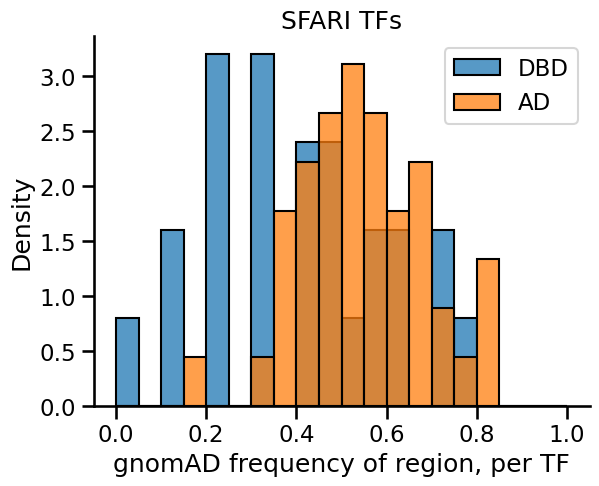

In [35]:
plt.title("SFARI TFs")
sns.set_context('talk')
sns.histplot(merged["DBD_prop"], bins = np.arange(0, 1.05, 0.05), stat = 'density', label = 'DBD')
sns.histplot(merged["AD_prop"], bins = np.arange(0, 1.05, 0.05), stat = 'density', label = 'AD')
plt.legend()
plt.xlabel("gnomAD frequency of region, per TF")
sns.despine()